In [ ]:
# Sutan Tadese
# Project week 3
# Heart Disease Dataset


In [ ]:
# Classfication Model to predict heart disease

In [4]:
from google.colab import files
uploaded = files.upload()


Saving heart_disease_uci.csv to heart_disease_uci.csv


In [1]:
!pip install tensorflow


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [5]:
data = pd.read_csv('heart_disease_uci.csv')
data.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
X = data.drop('num', axis=1)
y = data['num']
y_binary = y.copy()
y_binary[y_binary > 0] = 1

#ENCODING

X_encoded = pd.get_dummies(X)
X_encoded = X_encoded.fillna(X_encoded.mean())




scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

#split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_binary, test_size=0.2, random_state=42
)


In [7]:
# CLASSFICATION MODEL

model = keras.Sequential([
    #INPUT LAYER
    keras.Input(shape=(X_train.shape[1],)),
    # HIDDEN LAYER1
    layers.Dense(16, activation='relu'),
    #HIDDEN LAYER2
    layers.Dense(8, activation='relu'),
    # OUTPUT LAYER
    layers.Dense(1, activation='sigmoid')
])


In [8]:
optimizer = keras.optimizers.Adam(learning_rate=0.0005)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
)


In [9]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3978 - loss: 0.8168 - precision: 0.4397 - recall: 0.6515 - val_accuracy: 0.4595 - val_loss: 0.7522 - val_precision: 0.4762 - val_recall: 0.6667
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4588 - loss: 0.7448 - precision: 0.5132 - recall: 0.7032 - val_accuracy: 0.5473 - val_loss: 0.7102 - val_precision: 0.5364 - val_recall: 0.7867
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5594 - loss: 0.7081 - precision: 0.5735 - recall: 0.8167 - val_accuracy: 0.5878 - val_loss: 0.6730 - val_precision: 0.5614 - val_recall: 0.8533
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6154 - loss: 0.6727 - precision: 0.6049 - recall: 0.8496 - val_accuracy: 0.6419 - val_loss: 0.6414 - val_precision: 0.5982 - val_recall: 0.8933
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6542 - loss: 0.6246 - precision: 0.6631 - recall: 0.8288 - val_accuracy: 0.6622 - val_loss: 0.6146 - va

In [10]:
test_results = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_results[0]}")
print(f"Test Accuracy: {test_results[1]}")
print(f"Test Precision: {test_results[2]}")
print(f"Test Recall: {test_results[3]}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8710 - loss: 0.3739 - precision: 0.9004 - recall: 0.8819
Test Loss: 0.3545350730419159
Test Accuracy: 0.8695651888847351
Test Precision: 0.8899082541465759
Test Recall: 0.8899082541465759


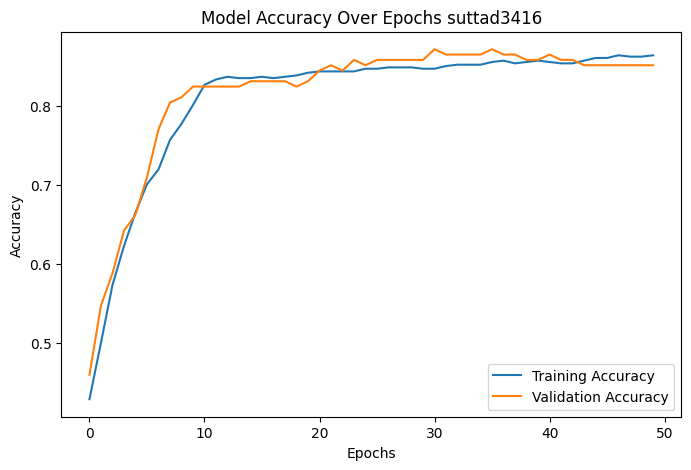

In [11]:
# VISUALIZATION
#ACCURACY
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs suttad3416')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

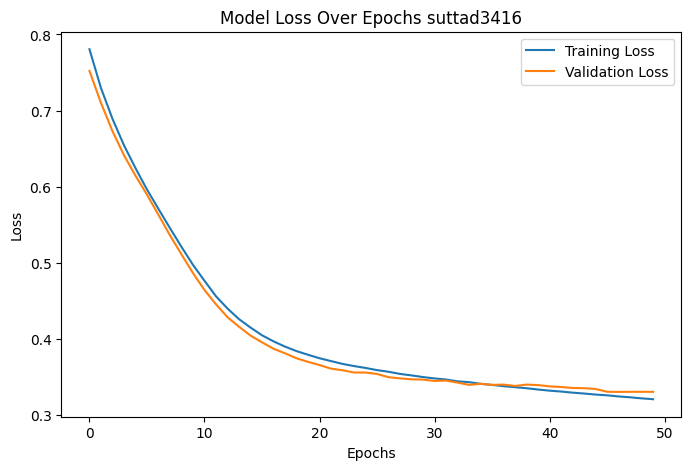

In [12]:
# VISUALIZATION
#LOSS
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs suttad3416')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
## Week 4 Assigment hyperparamter tuning

In [13]:
!pip install keras-tuner

import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers

#building
def build_model(hp):
    model = keras.Sequential()

    hp_units = hp.Int('units', min_value=32, max_value=128, step=32)
    model.add(layers.Dense(units=hp_units, activation='relu', input_shape=(X_train.shape[1],)))

    # adding dropout regularization and tuning the rate
    hp_dropout = hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)
    model.add(layers.Dropout(hp_dropout))

    model.add(layers.Dense(1, activation='sigmoid'))
    # Tuning learning rate
    hp_lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_lr),
        loss='binary_crossentropy',
        metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
    )
    return model
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='heart_disease_tuning'
)
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

Trial 5 Complete [00h 00m 04s]
val_accuracy: 0.8716216087341309

Best val_accuracy So Far: 0.8851351141929626
Total elapsed time: 00h 00m 18s


In [14]:
# the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best number of units: {best_hps.get('units')}")
print(f"Best dropout rate: {best_hps.get('dropout')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")


Best number of units: 128
Best dropout rate: 0.30000000000000004
Best learning rate: 0.001


In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# final model
final_model = Sequential()
final_model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
final_model.add(Dropout(0.1))
final_model.add(Dense(1, activation='sigmoid'))

final_model.compile(optimizer=Adam(learning_rate=0.01),
                     loss='binary_crossentropy',
                     metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

history = final_model.fit(X_train, y_train, epochs=20, validation_split=0.2)


Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7148 - loss: 0.5100 - precision_3: 0.7579 - recall_3: 0.7540 - val_accuracy: 0.8784 - val_loss: 0.3228 - val_precision_3: 0.8608 - val_recall_3: 0.9067
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8504 - loss: 0.3445 - precision_3: 0.8814 - recall_3: 0.8524 - val_accuracy: 0.8649 - val_loss: 0.3136 - val_precision_3: 0.8395 - val_recall_3: 0.9067
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8690 - loss: 0.3120 - precision_3: 0.9098 - recall_3: 0.8486 - val_accuracy: 0.8784 - val_loss: 0.3184 - val_precision_3: 0.8353 - val_recall_3: 0.9467
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8966 - loss: 0.2873 - precision_3: 0.9068 - recall_3: 0.9093 - val_accuracy: 0.8784 - val_loss: 0.3132 - val_precision_3: 0.8701 - val_recall_3: 0.8933
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9098 - loss: 0.2354 - precision_3: 0.9108 - recall_3: 0.9299 - val_accu

In [16]:
# model on test data
test_results = final_model.evaluate(X_test, y_test, verbose=0)

print(f"Test Accuracy: {test_results[1]:.4f}")
print(f"Test Precision: {test_results[2]:.4f}")
print(f"Test Recall: {test_results[3]:.4f}")


Test Accuracy: 0.8152
Test Precision: 0.9213
Test Recall: 0.7523


In [ ]:
## week 5
## Scenario and Impact Analysis Heart Disease Classification

In [ ]:
import pandas as pd
columns = X.columns
#scenario 1 Aging Population
scenario1_data = pd.DataFrame(X_test, columns=columns)
#age + 10
scenario1_data['age'] = scenario1_data['age'] + 10


In [19]:
scenario1_preds = model.predict(scenario1_data)
import numpy as np
scenario1_labels = np.where(scenario1_preds > 0.5, 1, 0)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [20]:
# Prediction  on the original  data
baseline_preds = model.predict(X_test)
baseline_labels = np.where(baseline_preds > 0.5, 1, 0)

print("Baseline EKG Positive Rate:", baseline_labels.mean())
print("Scenario 1 EKG Positive Rate (Older Patients):", scenario1_labels.mean())

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Baseline EKG Positive Rate: 0.592391304347826
Scenario 1 EKG Positive Rate (Older Patients): 0.592391304347826


In [ ]:
## scenario 2 Lower Blood Pressure

In [29]:
print(list(X_encoded.columns))

['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary', 'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal', 'restecg_st-t abnormality', 'exang_False', 'exang_True', 'slope_downsloping', 'slope_flat', 'slope_upsloping', 'thal_fixed defect', 'thal_normal', 'thal_reversable defect']


In [31]:
columns = [f'feature_{i}' for i in range(X_test.shape[1])]
scenario2_data = pd.DataFrame(X_test, columns=columns)

scenario2_data['feature_5'] = scenario2_data['feature_5'] * 0.9

In [32]:
# Prediction on Scenario 2
scenario2_preds = model.predict(scenario2_data)
import numpy as np
scenario2_labels = np.where(scenario2_preds > 0.5, 1, 0)

# Comparation
print("Baseline EKG Positive Rate:", baseline_labels.mean())
print("Scenario 2 EKG Positive Rate (Lower BP):", scenario2_labels.mean())

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Baseline EKG Positive Rate: 0.592391304347826
Scenario 2 EKG Positive Rate (Lower BP): 0.6032608695652174


In [ ]:
#Scenario 3: Higher Cholesterol

In [33]:
scenario3_data = pd.DataFrame(X_test, columns=columns)
scenario3_data['feature_6'] = scenario3_data['feature_6'] * 1.2

In [34]:
# Prediction  on Scenario 3 data
scenario3_preds = model.predict(scenario3_data)

scenario3_labels = np.where(scenario3_preds > 0.5, 1, 0)

# Comparation
print("Baseline EKG Positive Rate:", baseline_labels.mean())
print("Scenario 3 EKG Positive Rate (Higher Cholesterol):", scenario3_labels.mean())

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Baseline EKG Positive Rate: 0.592391304347826
Scenario 3 EKG Positive Rate (Higher Cholesterol): 0.592391304347826


In [ ]:
# final task
#Sensitivity Analysis
# for age

In [35]:
age_only = pd.DataFrame(X_test, columns=columns)
age_only['feature_1'] = age_only['feature_1'] + 10

# Prediction
age_preds = model.predict(age_only)
age_labels = np.where(age_preds > 0.5, 1, 0)

print("EKG Positive Rate with Age +10:", age_labels.mean())

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
EKG Positive Rate with Age +10: 0.6467391304347826


In [ ]:
#for cholesterol

In [36]:
chol_only = pd.DataFrame(X_test, columns=columns)
chol_only['feature_6'] = chol_only['feature_6'] * 1.2

# Prediction
chol_preds = model.predict(chol_only)
chol_labels = np.where(chol_preds > 0.5, 1, 0)

print("EKG Positive Rate with Cholesterol +20%:", chol_labels.mean())


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
EKG Positive Rate with Cholesterol +20%: 0.592391304347826


In [ ]:
# Regression Model predict chol level

In [19]:
#encoding

X_reg = X_encoded.drop('chol', axis=1)
y_reg = data['chol']

In [21]:
#sclaer
scaler = StandardScaler()
X_reg_scaled = scaler.fit_transform(X_reg)
y_reg_fixed = y_reg.fillna(y_reg.mean())

#split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_scaled, y_reg_fixed, test_size=0.2, random_state=42
)


In [22]:
#model
reg_model = keras.Sequential([
    keras.Input(shape=(X_train_reg.shape[1],)),
    # Input Layer
    layers.Dense(16, activation='relu'),
    # Hidden Layer 1
    layers.Dense(8, activation='relu'),
    # Hidden Layer 2
    layers.Dense(1)
    # Output Layer
])

In [23]:
reg_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [24]:
history_reg = reg_model.fit(
    X_train_reg, y_train_reg,
    epochs=50,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 48647.3125 - mae: 191.6329 - val_loss: 52775.3125 - val_mae: 205.2907
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 49884.2070 - mae: 195.7771 - val_loss: 52404.0469 - val_mae: 204.6063
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 47110.8867 - mae: 188.1097 - val_loss: 51931.9375 - val_mae: 203.7329
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 48847.9375 - mae: 194.9700 - val_loss: 51314.7773 - val_mae: 202.5739
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 49015.6836 - mae: 195.3495 - val_loss: 50548.2305 - val_mae: 201.1174
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 46220.7266 - mae: 188.2248 - val_loss: 49567.9648 - val_mae: 199.1919
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 47685.3711 - mae: 192.2200 - val_loss: 48355.5664 - val_mae: 196.7648
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 43966.6172 - mae: 183.5488 - val_loss: 46869.

In [25]:
test_results_reg = reg_model.evaluate(X_test_reg, y_test_reg)

print(f"Test MSE (Loss): {test_results_reg[0]}")
print(f"Test MAE: {test_results_reg[1]}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6761.0156 - mae: 63.0132 
Test MSE (Loss): 7087.3994140625
Test MAE: 64.23717498779297


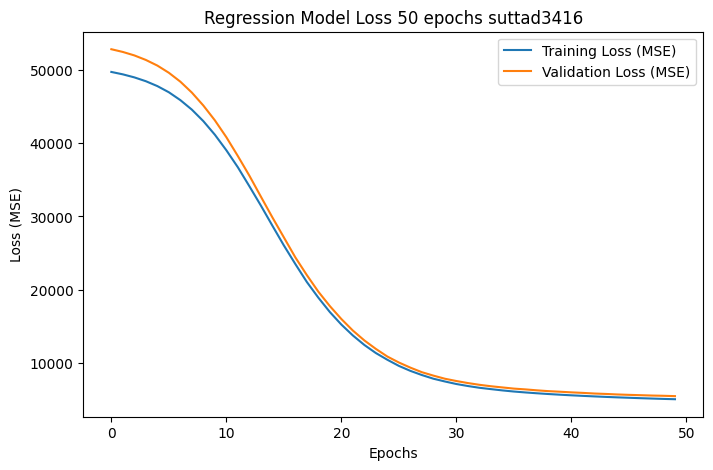

In [26]:
# Visualozation loss

plt.figure(figsize=(8,5))
plt.plot(history_reg.history['loss'], label='Training Loss (MSE)')
plt.plot(history_reg.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Regression Model Loss 50 epochs suttad3416')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()



In [ ]:
#week 4

In [27]:
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers
#building model
def build_regression_model(hp):
    model = keras.Sequential()

    hp_units = hp.Int('units', min_value=32, max_value=128, step=32)
    model.add(layers.Dense(units=hp_units, activation='relu', input_shape=(X_train_reg.shape[1],)))

    # Adding dropout and tuning the rate
    hp_dropout = hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)
    model.add(layers.Dropout(hp_dropout))

    model.add(layers.Dense(1, activation='linear'))
    # Tuning  learning rate
    hp_lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_lr),
                  loss='mean_squared_error',
                  metrics=['mae', 'mse'])
    return model

regression_tuner = kt.RandomSearch(
    build_regression_model,
    objective='val_mae',
    max_trials=5,
    executions_per_trial=1,
    directory='regression_dir',
    project_name='regression_tuning'
)
regression_tuner.search(X_train_reg, y_train_reg, epochs=10, validation_split=0.2)

Trial 5 Complete [00h 00m 05s]
val_mae: 206.1067657470703

Best val_mae So Far: 50.504425048828125
Total elapsed time: 00h 00m 23s


In [28]:
# Get the best hyperparameters
best_hps_reg = regression_tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best number of units: {best_hps_reg.get('units')}")
print(f"Best dropout rate: {best_hps_reg.get('dropout')}")
print(f"Best learning rate: {best_hps_reg.get('learning_rate')}")


Best number of units: 128
Best dropout rate: 0.30000000000000004
Best learning rate: 0.01


In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
# final model
final_regression_model = Sequential()
final_regression_model.add(Dense(128, activation='relu', input_shape=(X_train_reg.shape[1],)))
final_regression_model.add(Dropout(0.3))
final_regression_model.add(Dense(1, activation='linear'))

final_regression_model.compile(optimizer=Adam(learning_rate=0.01),
                                loss='mean_squared_error',
                                metrics=['mae', 'mse'])

history_reg = final_regression_model.fit(X_train_reg, y_train_reg, epochs=20, validation_split=0.2)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 50063.1250 - mae: 194.7398 - mse: 50063.1250 - val_loss: 47071.2617 - val_mae: 193.8572 - val_mse: 47071.2617
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 42072.5586 - mae: 178.7900 - mse: 42072.5586 - val_loss: 31692.3047 - val_mae: 156.7027 - val_mse: 31692.3047
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 24096.2383 - mae: 132.3168 - mse: 24096.2383 - val_loss: 14761.7090 - val_mae: 101.3912 - val_mse: 14761.7090
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11744.9814 - mae: 85.5820 - mse: 11744.9814 - val_loss: 8198.7754 - val_mae: 70.1670 - val_mse: 8198.7754
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7173.5654 - mae: 64.0011 - mse: 7173.5654 - val_loss: 6459.6572 - val_mae: 58.2905 - val_mse: 6459.6572
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6029.7822 - mae: 58.1768 - mse: 6029.7822 - val_loss: 5677.7236 - val_mae: 53.5087 - val_mse: 5677.7236
Epoch 7/20
19/19 

In [30]:
# final model on test data
test_results_reg = final_regression_model.evaluate(X_test_reg, y_test_reg, verbose=0)

print(f"Test MAE: {test_results_reg[1]:.4f}")
print(f"Test MSE: {test_results_reg[2]:.4f}")


Test MAE: 55.6728
Test MSE: 5736.6094


In [ ]:
# Clusetring Model

In [31]:
from sklearn.cluster import KMeans

X_cluster = X_encoded.drop('chol', axis=1)



In [32]:
#scale
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_cluster_scaled)


KMeans(n_clusters=3, random_state=42)

In [33]:
cluster_labels = kmeans.labels_
print("The first 10 cluster label:", cluster_labels[:10])


The first 10 cluster label: [2 2 2 2 2 2 2 2 2 2]


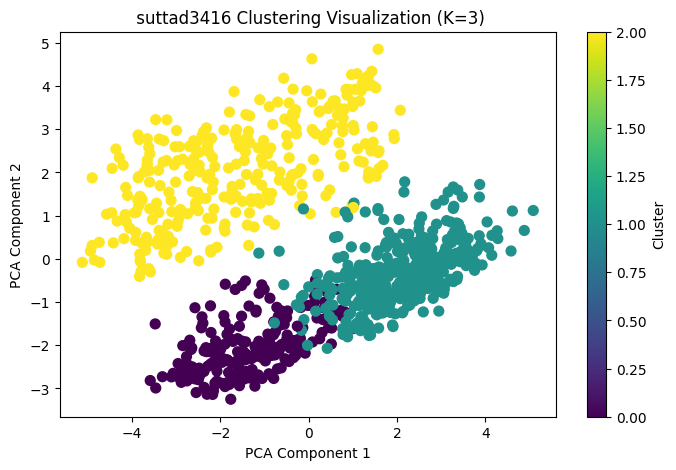

In [34]:
# visualize cluster
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

plt.figure(figsize=(8,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title(" suttad3416 Clustering Visualization (K=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
## week 4

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score for k={k}: {score}")


Silhouette Score for k=2: 0.127222101292855
Silhouette Score for k=3: 0.12580983863275494
Silhouette Score for k=4: 0.14967304099875708
Silhouette Score for k=5: 0.13512662665530667
Silhouette Score for k=6: 0.15514613250150436
Silhouette Score for k=7: 0.1588873962315211
Silhouette Score for k=8: 0.13938132251633015
Silhouette Score for k=9: 0.14482717979108634
Silhouette Score for k=10: 0.13109207361989705


In [36]:
# Retraining k = 7
best_k = 7
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
kmeans_final.fit(X_scaled)

labels_final = kmeans_final.labels_
final_score = silhouette_score(X_scaled, labels_final)

print(f"Final Silhouette Score with k=7: {final_score}")


Final Silhouette Score with k=7: 0.1588873962315211
